In [4]:
    from keras.datasets import mnist
    
    #loads the MNIST dataset
    (X_train, y_train),(X_test,y_test) = mnist.load_data()
    print(X_train.shape)

(60000, 28, 28)


In [6]:
# Printing the number of sample in X_train, X_test, y_train, y_test
print('Initial shape or Dimenstion of x_train', str(X_train.shape))

print('Number of samples in our training data:' +str(len(X_train)))
print('Number of labels in our training data:' +str(len(y_train)))
print('Number of samples in our test data:' +str(len(X_test)))
print('Number of labels in our test data:' +str(len(y_test)))
print()
print('Dimensions of X_train:' +str(X_train[0].shape))
print('Labels of X_train:' +str(y_train.shape))
print()
print('Dimestions of X_test:' +str(X_test[0].shape))
print('Labels of X_test:' +str(y_test.shape))

Initial shape or Dimenstion of x_train (60000, 28, 28)
Number of samples in our training data:60000
Number of labels in our training data:60000
Number of samples in our test data:10000
Number of labels in our test data:10000

Dimensions of X_train:(28, 28)
Labels of X_train:(60000,)

Dimestions of X_test:(28, 28)
Labels of X_test:(10000,)


**Take a look at some images in this datasets using OpenCV and Matplotlib**

In [7]:
import cv2
import numpy as np

# Use OpenCV to display 6 random images from our datasets
for i in range (0,6):
    random_num = np.random.randint(0, len(X_train))
    img = X_train[random_num]
    window_name = 'Random Sample #'+str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

 **Do the same thing but using matplotlib to plot 6 images**

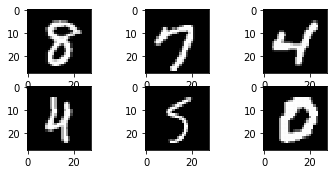

In [10]:
# importing matplotlib
import matplotlib.pyplot as plt

# Plots 6 images note subplot's arguments are nrows, ncols, index
# we set the color map to grey since our image dataset is Grayscale

plt.subplot(331)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

# Display out plots
plt.show()

**Prepare our dataset for training**

In [12]:
#Lets store the number of rows and columns
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]

# Getting our data in the right 'shape' needed for keras
# We need to add a 4th dimension to our thereby changing our
# original image shape of (60000, 28, 28) to (60000, 28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

#Store the shape of a single image
input_shape = (img_rows, img_cols, 1)

#change our image type to float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize our data by changing the range from(0 to 255) to (0 to 1)

X_train/= 255
X_test/= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples



**One Hot Encoding our Labels**


In [14]:
from keras.utils import np_utils

#Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns is our hot encoded matrix
print('Number of Classes:' +str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1]*X_train.shape[2]

Number of Classes:10


In [21]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

**Create Our Model**

In [22]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

In [43]:
# Create model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3),
                activation = 'relu',
                input_shape = input_shape))
model.add(Conv2D(32,(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

**Train our Model**

In [31]:
batch_size = 32
epochs = 5

history = model.fit(X_train, y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.6311 - accuracy: 0.8009 - val_loss: 0.1968 - val_accuracy: 0.9455
Epoch 2/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.2978 - accuracy: 0.9117 - val_loss: 0.1327 - val_accuracy: 0.9610
Epoch 3/5
60000/60000 [==============================] - 216s 4ms/step - loss: 0.2213 - accuracy: 0.9336 - val_loss: 0.0999 - val_accuracy: 0.9681
Epoch 4/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.1755 - accuracy: 0.9477 - val_loss: 0.0801 - val_accuracy: 0.9763
Epoch 5/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.1469 - accuracy: 0.9562 - val_loss: 0.0688 - val_accuracy: 0.9780
Test loss: 0.06879917464689352
Test Accuracy: 0.9779999852180481


**Ploting our Loss and Accuracy Charts**

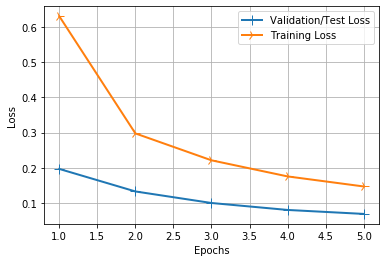

In [32]:
#Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)

line1 = plt.plot(epochs, val_loss_values, label= 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

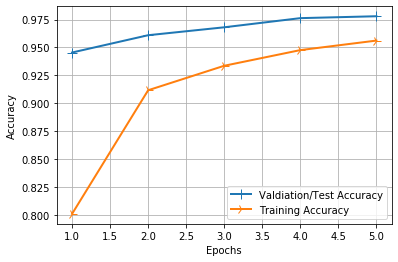

In [35]:
import matplotlib.pyplot as plt
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_acc_values, label = 'Valdiation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

**Saving our Model**

In [37]:
model.save("8_mnist_simple_cnn_5_epochs.h5")
print('model saved')

model saved


**Loading our Model**

In [38]:
from keras.models import load_model
classifier = load_model('8_mnist_simple_cnn_5_epochs.h5')

In [41]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value = BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255,0), 2)
    cv2.imshow(name, expanded_image)
    
for i in range(0, 10):
    rand = np.random.randint(0, len(X_test))
    input_im = X_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=4, fy =4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28,1)
    
    ##Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    
    draw_test("prediction", res, imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

**Generating the diagram of the model architecture**


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


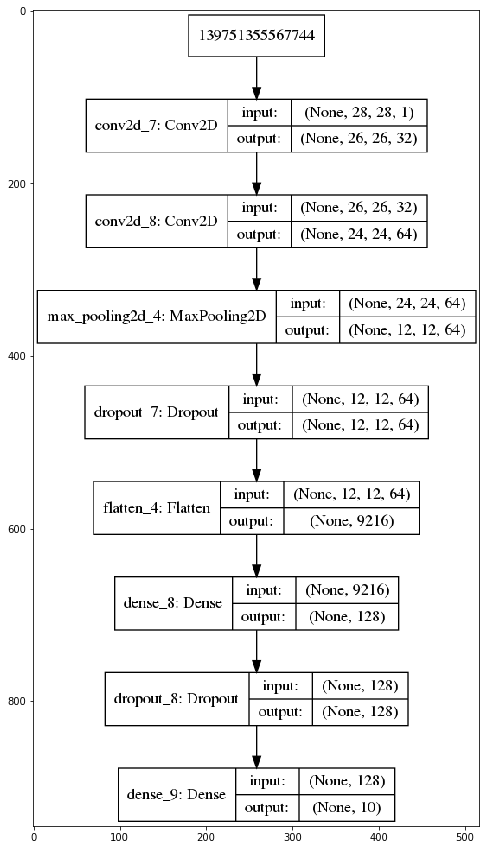

In [68]:
from keras.utils.vis_utils import plot_model

import matplotlib.image as mpimg
from keras.utils import np_utils
#import pydot_ng as pydot
import tensorflow as tf

%matplotlib inline
#save our model diagram to this path
#Generate the plot
tf.keras.utils.plot_model(model, to_file = 'model_plot_mnist.png',show_shapes = True,show_layer_names = True)

#show the plot here
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(30, 15))
implot = plt.imshow(img)